<a href="https://colab.research.google.com/github/jhkr1/Practical-Al-Natural-Language-Processing/blob/main/Document_Representation_BoW%2C_TDM%2C_TF_IDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. BoW(Bag of Words)

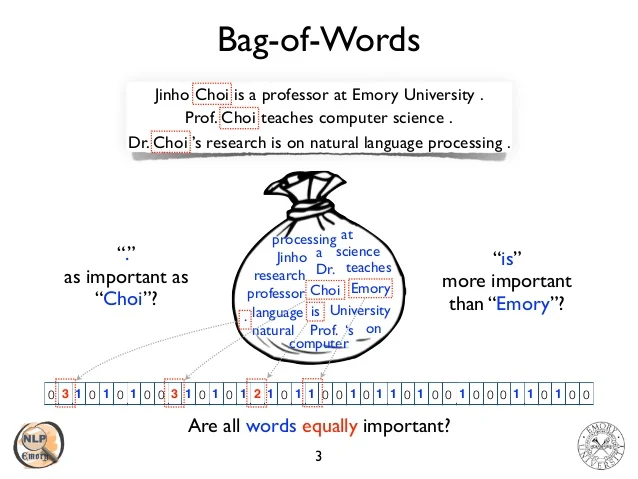

## 1-1) 직접 구현

In [ ]:
docs = ['오늘 동물원에서 원숭이를 봤어',
        '오늘 동물원에서 코끼리를 봤어 봤어',
        '동물원에서 원숭이에게 바나나를 줬어 바나나를']

### 1) 띄어쓰기 단위로 토큰화

In [ ]:
doc_ls = [doc.split() for doc in docs]
print(doc_ls)

[['오늘', '동물원에서', '원숭이를', '봤어'], ['오늘', '동물원에서', '코끼리를', '봤어', '봤어'], ['동물원에서', '원숭이에게', '바나나를', '줬어', '바나나를']]


### 2) 각 고유 토큰에 인덱스(Index)를 지정

In [ ]:
from collections import defaultdict

word2id = defaultdict(lambda : len(word2id))
[word2id[token] for doc in doc_ls for token in doc]
word2id

defaultdict(<function __main__.<lambda>()>,
            {'오늘': 0,
             '동물원에서': 1,
             '원숭이를': 2,
             '봤어': 3,
             '코끼리를': 4,
             '원숭이에게': 5,
             '바나나를': 6,
             '줬어': 7})

### 3) BoW 생성

In [ ]:
import numpy as np

BoW_ls = []

for i, doc in enumerate(doc_ls):
    bow = np.zeros(len(word2id), dtype=int)
    for token in doc:
        bow[word2id[token]] += 1
    BoW_ls.append(bow.tolist())
BoW_ls

[[1, 1, 1, 1, 0, 0, 0, 0], [1, 1, 0, 2, 1, 0, 0, 0], [0, 1, 0, 0, 0, 1, 2, 1]]

In [ ]:
from IPython.core import display as ICD
import pandas as pd

sorted_vocab = sorted((value, key) for key, value in word2id.items())
vocab = [v[1] for v in sorted_vocab]
for i in range(len(docs)):
  print("문서{} : {}".format(i, docs[i]))
  ICD.display(pd.DataFrame([BoW_ls[i]], columns=vocab))
  print("\n\n")

문서0 : 오늘 동물원에서 원숭이를 봤어


,오늘,동물원에서,원숭이를,봤어,코끼리를,원숭이에게,바나나를,줬어
0,1,1,1,1,0,0,0,0





문서1 : 오늘 동물원에서 코끼리를 봤어 봤어


,오늘,동물원에서,원숭이를,봤어,코끼리를,원숭이에게,바나나를,줬어
0,1,1,0,2,1,0,0,0





문서2 : 동물원에서 원숭이에게 바나나를 줬어 바나나를


,오늘,동물원에서,원숭이를,봤어,코끼리를,원숭이에게,바나나를,줬어
0,0,1,0,0,0,1,2,1


## 1-2) 단어 순서를 고려하지 않은 BoW

In [ ]:
docs = ['나는 양념 치킨을 좋아해 하지만 후라이드 치킨을 싫어해',
        '나는 후라이드 치킨을 좋아해 하지만 양념 치킨을 싫어해']

### 1) 띄어쓰기 단위로 토큰화

In [ ]:
doc_ls = [doc.split() for doc in docs]
doc_ls

[['나는', '양념', '치킨을', '좋아해', '하지만', '후라이드', '치킨을', '싫어해'],
 ['나는', '후라이드', '치킨을', '좋아해', '하지만', '양념', '치킨을', '싫어해']]

### 2) 각 고유 토큰에 인덱스(index)를 지정

In [ ]:
from collections import defaultdict

word2id = defaultdict(lambda : len(word2id))
[word2id[token] for doc in doc_ls for token in doc]
word2id

defaultdict(<function __main__.<lambda>()>,
            {'나는': 0,
             '양념': 1,
             '치킨을': 2,
             '좋아해': 3,
             '하지만': 4,
             '후라이드': 5,
             '싫어해': 6})

### 3) BoW 생성

In [ ]:
import numpy as np

BoW_ls = []

for i, doc in enumerate(doc_ls):
  bow = np.zeros(len(word2id), dtype=int)
  for token in doc:
    bow[word2id[token]] += 1
  BoW_ls.append(bow.tolist())
BoW_ls

[[1, 1, 2, 1, 1, 1, 1], [1, 1, 2, 1, 1, 1, 1]]

In [ ]:
from IPython.core import display as ICD

sorted_vocab = sorted((value, key) for key, value in word2id.items())
vocab = [v[1] for v in sorted_vocab]

for i in range(len(docs)):
  print("문서{} : {}".format(i, docs[i]))
  ICD.display(pd.DataFrame([BoW_ls[i]], columns=vocab))
  print("\n\n")

문서0 : 나는 양념 치킨을 좋아해 하지만 후라이드 치킨을 싫어해


,나는,양념,치킨을,좋아해,하지만,후라이드,싫어해
0,1,1,2,1,1,1,1





문서1 : 나는 후라이드 치킨을 좋아해 하지만 양념 치킨을 싫어해


,나는,양념,치킨을,좋아해,하지만,후라이드,싫어해
0,1,1,2,1,1,1,1


## 1-3) sklearn 활용

In [ ]:
docs = ['오늘 동물원에서 원숭이를 봤어',
        '오늘 동물원에서 코끼리를 봤어 봤어',
        '동물원에서 원숭이에게 바나나를 줬어 바나나를']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
BoW = count_vect.fit_transform(docs)
BoW.toarray()[0]

array([1, 0, 1, 1, 1, 0, 0, 0])

In [ ]:
from IPython.core import display as ICD

vocab = count_vect.get_feature_names_out()
for i in range(len(docs)) :
  print("문서{} : {}".format(i, docs[i]))
  ICD.display(pd.DataFrame([BoW.toarray()[i]], columns=vocab))
  print("\n\n")

문서0 : 오늘 동물원에서 원숭이를 봤어


,동물원에서,바나나를,봤어,오늘,원숭이를,원숭이에게,줬어,코끼리를
0,1,0,1,1,1,0,0,0





문서1 : 오늘 동물원에서 코끼리를 봤어 봤어


,동물원에서,바나나를,봤어,오늘,원숭이를,원숭이에게,줬어,코끼리를
0,1,0,2,1,0,0,0,1





문서2 : 동물원에서 원숭이에게 바나나를 줬어 바나나를


,동물원에서,바나나를,봤어,오늘,원숭이를,원숭이에게,줬어,코끼리를
0,1,2,0,0,0,1,1,0


## 1-4) gensim 활용

In [ ]:
docs = ['오늘 동물원에서 원숭이를 봤어',
        '오늘 동물원에서 코끼리를 봤어 봤어',
        '동물원에서 원숭이에게 바나나를 줬어 바나나를']

In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 9.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
thinc 8.3.6 requ

In [ ]:
import gensim
import numpy as np
from gensim import corpora

doc_ls = [doc.split() for doc in docs]
id2word = corpora.Dictionary(doc_ls)
BoW = [id2word.doc2bow(doc) for doc in doc_ls]
BoW[0]

[(0, 1), (1, 1), (2, 1), (3, 1)]

In [ ]:
from gensim.matutils import sparse2full
from IPython.core import display as ICD
import pandas as pd

vocab = [id2word[i] for i in id2word.keys()]
for i in range(len(docs)) :
  print("문서{} : {}".format(i, docs[i]))
  ICD.display(pd.DataFrame([sparse2full(BoW[0], len(vocab))], columns=vocab))
  print("\n\n")

문서0 : 오늘 동물원에서 원숭이를 봤어


,동물원에서,봤어,오늘,원숭이를,코끼리를,바나나를,원숭이에게,줬어
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0





문서1 : 오늘 동물원에서 코끼리를 봤어 봤어


,동물원에서,봤어,오늘,원숭이를,코끼리를,바나나를,원숭이에게,줬어
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0





문서2 : 동물원에서 원숭이에게 바나나를 줬어 바나나를


,동물원에서,봤어,오늘,원숭이를,코끼리를,바나나를,원숭이에게,줬어
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


# 2. TDM (Term-Document Matrix)

## 2-1) 직접 구현

In [ ]:
docs = ['오늘 동물원에서 원숭이를 봤어',
        '오늘 동물원에서 코끼리를 봤어 봤어',
        '동물원에서 원숭이에게 바나나를 줬어 바나나를']

### 1) 띄어쓰기 단위로 토큰화

In [ ]:
doc_ls = [doc.split() for doc in docs]
doc_ls

[['오늘', '동물원에서', '원숭이를', '봤어'],
 ['오늘', '동물원에서', '코끼리를', '봤어', '봤어'],
 ['동물원에서', '원숭이에게', '바나나를', '줬어', '바나나를']]

### 2) 각 고유 토큰에 인덱스(Index)를 지정

In [ ]:
from collections import defaultdict

word2id = defaultdict(lambda : len(word2id))
[word2id[token] for doc in doc_ls for token in doc]
word2id

defaultdict(<function __main__.<lambda>()>,
            {'오늘': 0,
             '동물원에서': 1,
             '원숭이를': 2,
             '봤어': 3,
             '코끼리를': 4,
             '원숭이에게': 5,
             '바나나를': 6,
             '줬어': 7})

### 3) TDM 생성

In [ ]:
import numpy as np

TDM = np.zeros((len(word2id), len(doc_ls)), dtype=int) # 8행 3열 배열 생성
for i, doc in enumerate(doc_ls):
  for token in doc:
    TDM[word2id[token], i] += 1
TDM


array([[1, 1, 0],
       [1, 1, 1],
       [1, 0, 0],
       [1, 2, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 2],
       [0, 0, 1]])

In [ ]:
import pandas as pd

doc_names = ['문서'+ str(i) for i in range(len(doc_ls))]
sorted_vocab = sorted((value, key) for key, value in word2id.items())
vocab = [v[1] for v in sorted_vocab]
df_TDM = pd.DataFrame(TDM, columns=doc_names)
df_TDM['단어'] = vocab
df_TDM.set_index('단어')

,문서0,문서1,문서2
단어,,,
오늘,1,1,0
동물원에서,1,1,1
원숭이를,1,0,0
봤어,1,2,0
코끼리를,0,1,0
원숭이에게,0,0,1
바나나를,0,0,2
줬어,0,0,1


## 2-2) sklearn 활용

In [ ]:
docs = ['오늘 동물원에서 원숭이를 봤어',
        '오늘 동물원에서 코끼리를 봤어 봤어',
        '동물원에서 원숭이에게 바나나를 줬어 바나나를']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
TDM = count_vect.fit_transform(docs)
TDM.toarray()

array([[1, 0, 1, 1, 1, 0, 0, 0],
       [1, 0, 2, 1, 0, 0, 0, 1],
       [1, 2, 0, 0, 0, 1, 1, 0]])

In [ ]:
import pandas as pd

import pandas as pd

doc_names = ['문서'+ str(i) for i in range(len(docs))]
vocab = count_vect.get_feature_names_out()
df_TDM = pd.DataFrame(TDM.toarray().T, columns=doc_names)
df_TDM['단어'] = vocab
df_TDM.set_index('단어')

,문서0,문서1,문서2
단어,,,
동물원에서,1,1,1
바나나를,0,0,2
봤어,1,2,0
오늘,1,1,0
원숭이를,1,0,0
원숭이에게,0,0,1
줬어,0,0,1
코끼리를,0,1,0


## 2-3) gensim 활용

In [ ]:
docs = ['오늘 동물원에서 원숭이를 봤어',
        '오늘 동물원에서 코끼리를 봤어 봤어',
        '동물원에서 원숭이에게 바나나를 줬어 바나나를']

In [ ]:
import gensim
from gensim import corpora

doc_ls = [doc.split() for doc in docs]
id2word = corpora.Dictionary(doc_ls)
TDM = [id2word.doc2bow(doc) for doc in doc_ls]
TDM

[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(0, 1), (1, 2), (2, 1), (4, 1)],
 [(0, 1), (5, 2), (6, 1), (7, 1)]]

In [ ]:
import pandas as pd

doc_names = ['문서'+ str(i) for i in range(len(doc_ls))]
vocab = [id2word[i] for i in id2word.keys()]
TDM_matrix = [sparse2full(doc, len(vocab)).tolist() for doc in TDM]

df_TDM = pd.DataFrame(np.array(TDM_matrix, dtype=int).T, columns=doc_names)
df_TDM['단어'] = vocab
df_TDM.set_index('단어')


,문서0,문서1,문서2
단어,,,
동물원에서,1,1,1
봤어,1,2,0
오늘,1,1,0
원숭이를,1,0,0
코끼리를,0,1,0
바나나를,0,0,2
원숭이에게,0,0,1
줬어,0,0,1


In [ ]:
TDM_matrix

[[1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 2.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 1.0, 1.0]]

# 3. TF-IDF (Term Frequency-Inverse Document Frequency)

1.svg

* TF(단어 빈도, Term Frequency) : 단어가 문서 내에 등장하는 빈도
* IDF(역문서 빈도, Inverse Document Frequency) : 단어가 여러 문서에 공통적으로 등장하는 빈도
한 문서 내에 자주 등장하고 다른 문서에 자주 등장하지 않는 단어를 주요 단어로 판별할 수 있음

## 3-1) 직접 계산하기

In [1]:
d1 = "The cat sat on my face I hate a cat"
d2 = "The dog sat on my bed I love a dog"
doc_ls = [d1, d2]

In [8]:
import numpy as np
from collections import defaultdict

def tf(t, d) :
  return d.count(t) / len(d)

def idf (t, D) :
  N = len(D)
  n = len([True for d in D if t in d])
  return np.log(N/n)

def tfidf (t,d,D) :
  return tf(t,d) * idf(t,D)

def tokenizer(d) :
  return d.split()

def tfidfScorer(D) :
  doc_ls = [tokenizer(d) for d in D]
  word2id = defaultdict(lambda:len(word2id))

  [word2id[t] for d in doc_ls for t in d]

  tfidf_mat = np.zeros((len(doc_ls), len(word2id)))
  for i, d in enumerate(doc_ls) :
    for t in d :
      tfidf_mat[i, word2id[t]] = tfidf(t, d, D)

  return tfidf_mat, word2id.keys()

In [9]:
mat, vocab = tfidfScorer(doc_ls)

In [10]:
import pandas as pd
pd.DataFrame(mat, columns=vocab)

,The,cat,sat,on,my,face,I,hate,a,dog,bed,love
0,0.0,0.138629,0.0,0.0,0.0,0.069315,0.0,0.069315,0.0,0.000000,0.000000,0.000000
1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.138629,0.069315,0.069315


## 3-2) sklearn 활용

In [11]:
d1 = "The cat sat on my face I hate a cat"
d2 = "The dog sat on my bed I love a dog"
docs = [d1, d2]

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(docs)
tfidf.todense()

matrix([[0.        , 0.70600557, 0.        , 0.35300279, 0.35300279,
         0.        , 0.25116439, 0.25116439, 0.25116439, 0.25116439],
        [0.35300279, 0.        , 0.70600557, 0.        , 0.        ,
         0.35300279, 0.25116439, 0.25116439, 0.25116439, 0.25116439]])

In [13]:
import pandas as pd

pd.DataFrame(tfidf.todense(), columns=tfidf_vect.get_feature_names_out())

,bed,cat,dog,face,hate,love,my,on,sat,the
0,0.000000,0.706006,0.000000,0.353003,0.353003,0.000000,0.251164,0.251164,0.251164,0.251164
1,0.353003,0.000000,0.706006,0.000000,0.000000,0.353003,0.251164,0.251164,0.251164,0.251164


## 3-3) gensim 활용

In [1]:
d1 = "The cat sat on my face I hate a cat"
d2 = "The dog sat on my bed I love a dog"
docs = [d1, d2]

In [17]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 96.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 129.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 22.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
thinc 8.3.6 re

In [2]:
import gensim
from gensim import corpora
from gensim.models import TfidfModel

doc_ls = [d.split() for d in docs]
id2word = corpora.Dictionary(doc_ls)
TDM = [id2word.doc2bow(d) for d in doc_ls]
model = TfidfModel(TDM)

In [3]:
model[TDM][0]

[(3, 0.8164965809277261), (4, 0.4082482904638631), (5, 0.4082482904638631)]

In [4]:
from gensim.matutils import sparse2full

TDM_matrix = [ sparse2full(d, len(id2word)).tolist() for d in model[TDM]]

In [5]:
import pandas as pd
pd.DataFrame(TDM_matrix, columns=id2word.values())

,I,The,a,cat,face,hate,my,on,sat,bed,dog,love
0,0.0,0.0,0.0,0.816497,0.408248,0.408248,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.408248,0.816497,0.408248
